# Data

In [ ]:
#!aws s3 cp s3://team-banking-fraud/PS_20174392719_1491204439457_log.csv data.csv


In [ ]:
#!unzip paysim1.zip

In [4]:
import pandas as pd

filename = 'PS_20174392719_1491204439457_log.csv'

df = pd.read_csv(filename)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [7]:
df["nameDest"].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
C977993101      96
C97730845       96
C392292416      95
C1899073220     92
C306206744      91
C1782113663     90
C1234776885     90
C716083600      89
C998351292      89
C909295153      88
C1674899618     86
C667346055      86
C1262822392     85
C1255024717     84
C453211571      84
C1816757085     84
C2006081398     83
C1504109395     82
C991363637      82
C932583850      82
              ... 
C1763766651      1
M1349004622      1
M1736286692      1
M1298457223      1
M884486076       1
M345971810       1
M2020754486      1
M1818346052      1
M1203687080      1
M986880022       1
M1170587992      1
M1404469707      1
M1261693482      1
M635963659       1
C1129194843      1
M1068508452      1
M1006257079      1
M1951745562      1
M946211896       1
M185740392       1
M595087389       1
M2069930539 

In [8]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

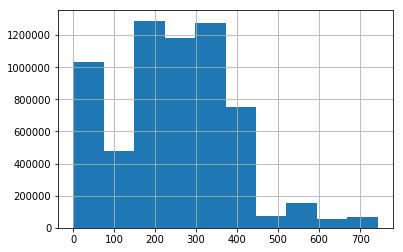

In [10]:
import matplotlib

%matplotlib inline
df["step"].hist()

In [11]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


The fraud data is fairly clean; there are no missing values.

Split the fraud data into 3: training, validation, and test sets.

## Drop id columns

In [22]:
#df = pd.get_dummies(df, ["type"])
df2 = df.drop(["nameOrig","nameDest"], axis=1)
list(df2.columns)

['step',
 'type',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [23]:
df2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [24]:
df3 = pd.get_dummies(df2, columns=["type"])
df3.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0,1,0


In [25]:
list(df3.columns)

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud',
 'type_CASH_IN',
 'type_CASH_OUT',
 'type_DEBIT',
 'type_PAYMENT',
 'type_TRANSFER']

In [34]:
df3.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277,0.004077,-0.012918,0.002869,0.004926,0.006925
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295,-0.009621,-0.004376,-0.023379,-0.197444,0.365896
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835,0.506761,-0.200899,-0.021450,-0.189486,-0.081593
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776,0.527373,-0.210977,-0.021872,-0.193915,-0.087355
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513,0.076105,0.086028,0.009347,-0.231455,0.130476
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529,0.034988,0.093476,0.006346,-0.238315,0.191701
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109,-0.019089,0.011256,-0.002911,-0.025697,0.053869
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000,-0.000842,-0.001168,-0.000128,-0.001133,0.005245
type_CASH_IN,0.004077,-0.009621,0.506761,0.527373,0.076105,0.034988,-0.019089,-0.000842,1.000000,-0.391047,-0.042987,-0.379522,-0.160535
type_CASH_OUT,-0.012918,-0.004376,-0.200899,-0.210977,0.086028,0.093476,0.011256,-0.001168,-0.391047,1.000000,-0.059625,-0.526422,-0.222672


In [54]:
df3["newbalanceZero"] = 0

In [59]:
#df3["new_balance_zero"] = 1 if (df3["newbalanceOrig"] == 0.0) else 0
for idx, row in df3.iterrows():
#    d = 1 if (row["newbalanceOrig"] == 0) else 0

    newBalance = row['newbalanceOrig']
    if newBalance == 0:
        df3.at[idx, 'newbalanceZero'] = 1
    else:
        df3.at[idx, 'newbalanceZero'] = 0
#    d = row["newbalanceOrig"]
#    df3.iloc[idx, "newbalanceZero"] =  d
df3.head()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,newbalanceZero
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,0,1,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0,0,0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0,1,0,0


In [61]:
df3['newbalanceZero'].value_counts()

1    3609566
0    2753054
Name: newbalanceZero, dtype: int64

In [62]:
df3.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,newbalanceZero
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277,0.004077,-0.012918,0.002869,0.004926,0.006925,0.005390
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295,-0.009621,-0.004376,-0.023379,-0.197444,0.365896,0.115566
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835,0.506761,-0.200899,-0.021450,-0.189486,-0.081593,-0.323722
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776,0.527373,-0.210977,-0.021872,-0.193915,-0.087355,-0.334857
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513,0.076105,0.086028,0.009347,-0.231455,0.130476,0.041383
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529,0.034988,0.093476,0.006346,-0.238315,0.191701,0.079761
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109,-0.019089,0.011256,-0.002911,-0.025697,0.053869,0.029984
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000,-0.000842,-0.001168,-0.000128,-0.001133,0.005245,-0.001816
type_CASH_IN,0.004077,-0.009621,0.506761,0.527373,0.076105,0.034988,-0.019089,-0.000842,1.000000,-0.391047,-0.042987,-0.379522,-0.160535,-0.607976
type_CASH_OUT,-0.012918,-0.004376,-0.200899,-0.210977,0.086028,0.093476,0.011256,-0.001168,-0.391047,1.000000,-0.059625,-0.526422,-0.222672,0.475586


In [72]:
df3 = df3[['isFraud', 'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER',
       'newbalanceZero']]
#df3.columns

In [85]:
df4 = df3[['isFraud', 'step', 'amount', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type_TRANSFER', 'newbalanceZero']]


In [86]:
import numpy as np

model_data = df4
train_data, validation_data, test_data = np.split(model_data.sample(frac=1, random_state=1729), [int(0.7*len(model_data)), int(0.9*len(model_data))])
train_data.to_csv('train.csv', header=False, index=False)
validation_data.to_csv('validation.csv', header=False, index=False)
test_data.to_csv('test.csv', header=False, index=False)

# Train
See https://github.com/awslabs/amazon-sagemaker-examples/blob/master/introduction_to_applying_machine_learning/xgboost_customer_churn/xgboost_customer_churn.ipynb

In [87]:
import boto3
import os

bucket = 'team-banking-fraud'
prefix = 'SageMaker'
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation/validation.csv')).upload_file('validation.csv')

In [88]:
import sagemaker

from sagemaker import get_execution_role
role = get_execution_role()

from sagemaker.amazon.amazon_estimator import get_image_uri
container = get_image_uri(boto3.Session().region_name, 'xgboost', '0.90-1')


s3_input_train = sagemaker.s3_input(s3_data='s3://{}/{}/train'.format(bucket, prefix), content_type='csv')
s3_input_validation = sagemaker.s3_input(s3_data='s3://{}/{}/validation/'.format(bucket, prefix), content_type='csv')



In [89]:
sess = sagemaker.Session()

xgb = sagemaker.estimator.Estimator(container,
                                    role,
                                    base_job_name = 'frud',
                                    train_instance_count=1, 
                                    train_instance_type='ml.m4.xlarge',
                                    output_path='s3://{}/{}/output'.format(bucket, prefix),
                                    sagemaker_session=sess)
xgb.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        silent=0,
                        objective='binary:logistic',
                        num_round=100)

xgb.fit({'train': s3_input_train, 'validation': s3_input_validation})

2020-01-29 19:53:41 Starting - Starting the training job...
2020-01-29 19:53:43 Starting - Launching requested ML instances......
2020-01-29 19:54:46 Starting - Preparing the instances for training......
2020-01-29 19:55:50 Downloading - Downloading input data...
2020-01-29 19:56:41 Training - Training image download completed. Training in progress..INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[19:56:44] 4453834x7 matrix with 31176838 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
INFO

[99]#011train-error:0.00045#011validation-error:0.000451

2020-01-29 20:03:53 Completed - Training job completed
Training seconds: 483
Billable seconds: 483


In [90]:
xgb_predictor = xgb.deploy(initial_instance_count = 1, instance_type = 'ml.m4.xlarge')

---------------------!

In [91]:
from sagemaker.predictor import csv_serializer

xgb_predictor.content_type = 'text/csv'
xgb_predictor.serializer = csv_serializer
xgb_predictor.deserializer = None

In [92]:

# Now, we'll use a simple function to:
#
# 1. Loop over our test dataset
# 2. Split it into mini-batches of rows
# 3. Convert those mini-batchs to CSV string payloads
# 4. Retrieve mini-batch predictions by invoking the XGBoost endpoint
# 5. Collect predictions and convert from the CSV output our model provides into a NumPy array

def predict(data, rows=500):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join([predictions, xgb_predictor.predict(array).decode('utf-8')])

    return np.fromstring(predictions[1:], sep=',')

predictions = predict(test_data.as_matrix()[:, 1:])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [93]:
pd.crosstab(index=test_data.iloc[:, 0], columns=np.round(predictions), rownames=['actual'], colnames=['predictions'])

predictions,0.0,1.0
actual,,
0,635412,23
1,258,569


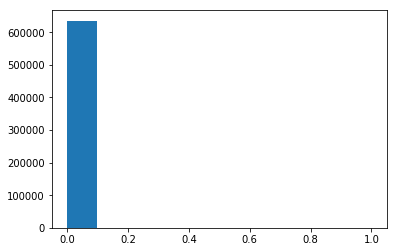

In [84]:
import matplotlib.pyplot as plt

plt.hist(predictions)
plt.show()

## First Test

Confusion Matric

| predictions |	0.0 | 1.0 |
|-------------|-----|-----|
| actual	0 |	635414 | 21 |
|		    1 | 162	|    665|


		

In [104]:

def summary(true_neg, false_pos, false_neg, true_pos):
    total_predictions = true_neg + false_pos + false_neg + true_pos
    pos_predictions = false_pos + true_pos
    positive_samples = false_neg + true_pos

    recall = true_pos / positive_samples
    precision = true_pos / pos_predictions
    accuracy = (true_pos + true_neg)/ total_predictions

    print(f'recall: {recall}')
    print(f'precision: {precision}')
    print(f'accuracy: {accuracy}')

summary(true_neg=635414, false_pos=21, false_neg=162, true_pos=665)



recall: 0.8041112454655381
precision: 0.9693877551020408
accuracy: 0.9997123826348265


## Second Test

Confusion Matric

| predictions | 0.0 |1.0 |
|-------------|-----|----|
| actual	0 |635412 |	23 |
|   		1 | 258 |	 569|

In [105]:
summary(635412, 23, 258, 569)

recall: 0.6880290205562273
precision: 0.9611486486486487
accuracy: 0.9995583580348976
